# HW 9, Assignment 1
## Author: Sofiya Elyukin
### Collaborated with: 

In [28]:
# import modules
from __future__ import print_function
import json
import os
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
import pylab as pl

%pylab inline

plotParams = json.load( open(os.getenv('PUI2016')+'/matplotlibrc.json') )
pl.rcParams.update(plotParams)

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# Get data

url = 'https://raw.githubusercontent.com/fedhere/PUI2016_fb55/master/HW9_fb55/MTA_Fare.npy'
os.system("curl -O " + url)
os.system("mv MTA_Fare.npy " + os.getenv("PUIDATA") + "/MTA_Fare.npy")
MTArides = np.load(os.getenv("PUIDATA") + '/MTA_Fare.npy')

In [3]:
print (MTArides.shape)
print ('There are', MTArides.shape[0], 'stations', MTArides.shape[1], 'card types, and', MTArides.shape[2], 
       'weeks in this dataset.')

(600, 23, 194)
There are 600 stations 23 card types, and 194 weeks in this dataset.


In [4]:
# Missing  data is entered as -1. Change to NaN
MTArides = MTArides.astype(np.float, copy = False)
MTArides[MTArides == -1] = np.nan

In [5]:
# Array for metrocard types
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

# Create a date range
rng = pd.date_range('5/21/2010', periods=194, freq='W')

In [6]:
# Sum time series for all stations, left with 
MTAall = np.nansum(MTArides, axis=0)
print (MTAall.shape)
# Sum time series for all metrocard types
MTAall = np.nansum(MTAall, axis=0)
print (MTAall.shape)

(23, 194)
(194,)


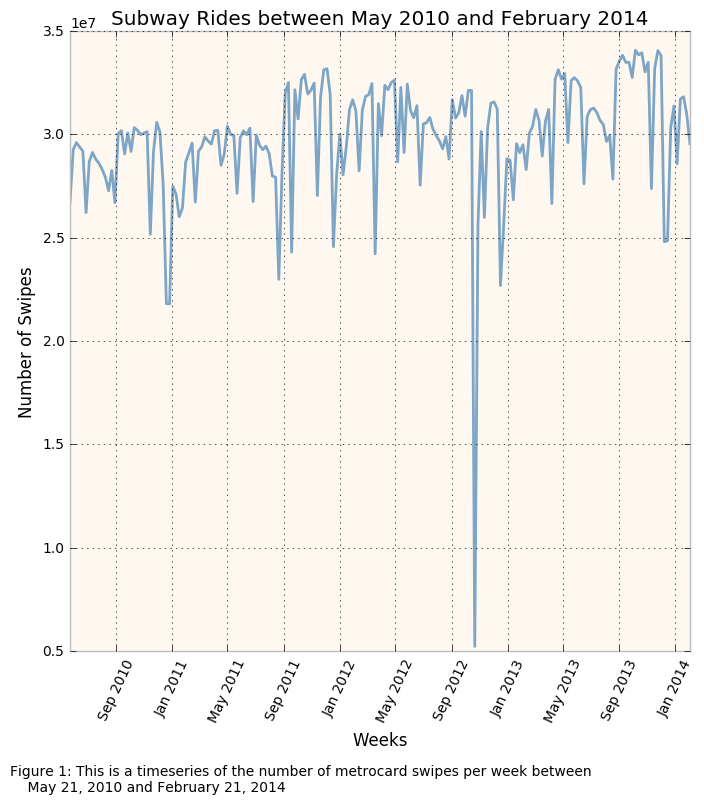

In [29]:
# Original timeseries plot
pl.figure(figsize = (8,8))
pl.plot(rng, MTAall, alpha = 0.7)
pl.xticks(rotation = '65')
pl.xlabel("Weeks", size='large')
pl.ylabel("Number of Swipes", size='large')
pl.title("Subway Rides between May 2010 and February 2014", size='x-large')
pl.figtext(.05, -0.05, '''Figure 1: This is a timeseries of the number of metrocard swipes per week between
    May 21, 2010 and February 21, 2014''')

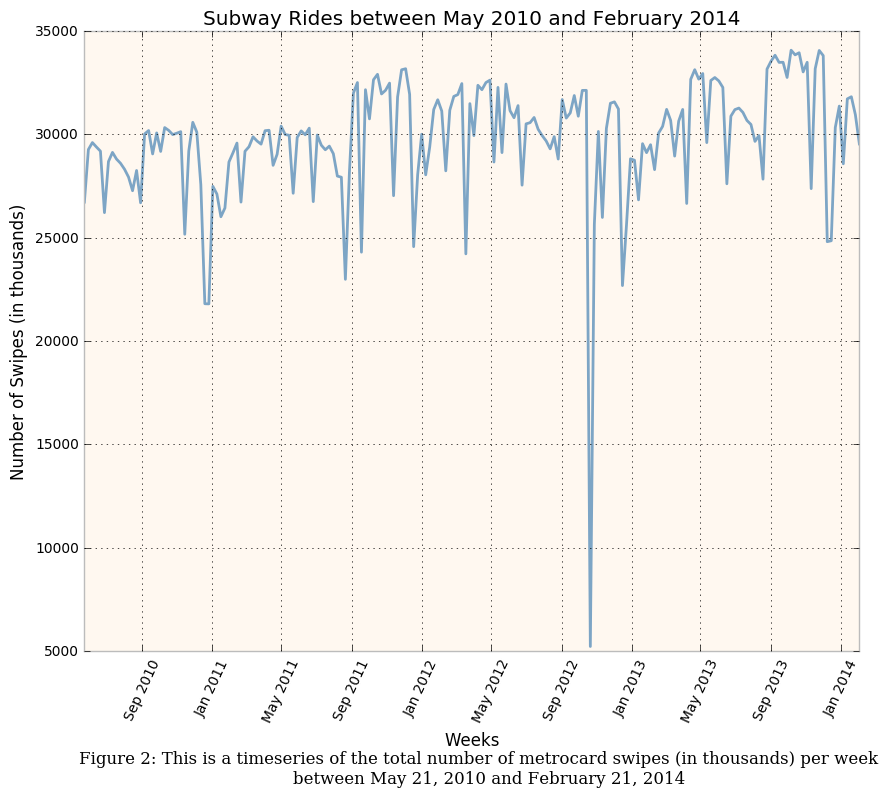

In [44]:
# Make a clealer plot  
pl.figure(figsize = (10,8))
pl.plot(rng, (MTAall / 1000), alpha = 0.7)
pl.xticks(rotation = '65')
pl.xlabel("Weeks", size='large')
pl.ylabel("Number of Swipes (in thousands)", size='large')
pl.title("Subway Rides between May 2010 and February 2014", size='x-large')
pl.figtext(.12, -0.04, '''Figure 2: This is a timeseries of the total number of metrocard swipes (in thousands) per week
    between May 21, 2010 and February 21, 2014''', fontname='serif', size="large", multialignment="center")

In [87]:
# For event detection, need to find an occurrence of ridership falling more than 3 standard deviations away from the mean

# from FDNYdeaths.ipynb, modified to find the mean, standard deviation, and 3-sigma thresholds for the data
mean = np.nanmean(MTAall)
print ("The mean number of rides per week is {:.2f}".format(np.nanmean(MTAall)))
print ("The standard deviation of rides per week is {:.2f}".format(np.nanstd(MTAall)))
thresholds = np.nanmean(MTAall) + 3 * np.nanstd(MTAall), np.nanmean(MTAall) - 3 * np.nanstd(MTAall)
print ("The 3-sigma thresholds for rides per week is {:.2f} and {:.2f}".format(*thresholds))

The mean number of rides per week is 29781349.87
The standard deviation of rides per week is 2983960.42
The 3-sigma thresholds for rides per week is 38733231.14 and 20829468.61


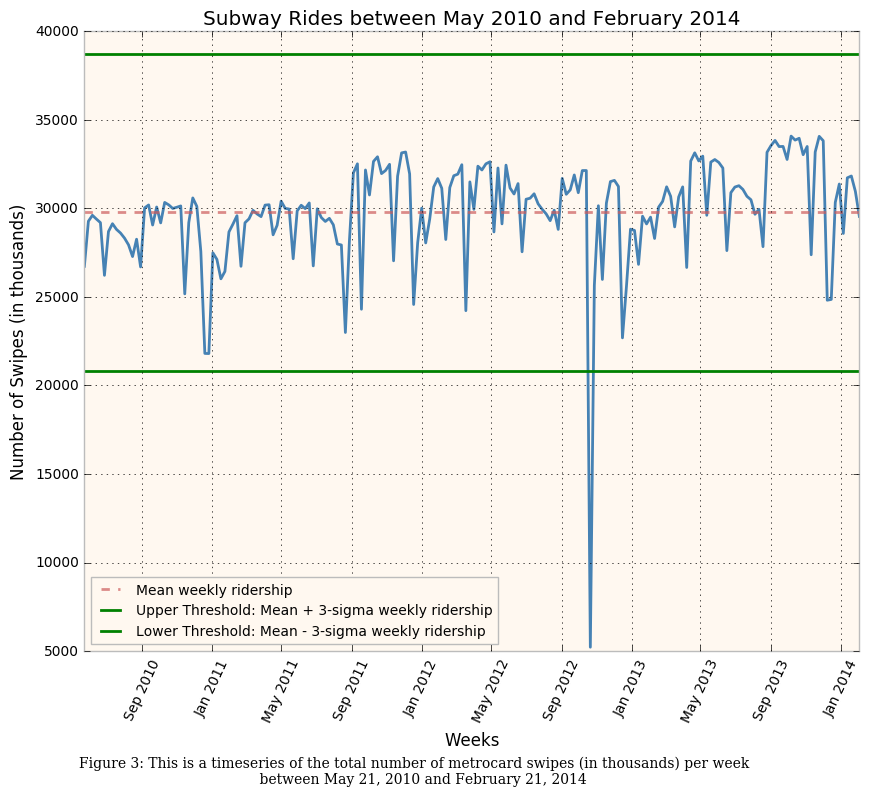

In [107]:
# Plot timeseries with 3-sigma thresholds
pl.figure(figsize = (10,8))
pl.plot(rng, (MTAall / 1000))
pl.xticks(rotation = '65')
pl.xlabel("Weeks", size='large')
pl.ylabel("Number of Swipes (in thousands)", size='large')
pl.title("Subway Rides between May 2010 and February 2014", size='x-large')
pl.figtext(.12, -0.04, '''Figure 3: This is a timeseries of the total number of metrocard swipes (in thousands) per week
    between May 21, 2010 and February 21, 2014''', fontname='serif', multialignment="center")

# Plot mean
pl.plot((min(rng), max(rng)), ((mean / 1000), (mean / 1000)), '--', alpha = 0.7, label="Mean weekly ridership")

# Plot upper threshold
pl.plot((min(rng), max(rng)), ((thresholds[0] / 1000), (thresholds[0] / 1000)), 
        label="Upper Threshold: Mean + 3-sigma weekly ridership")

# Plot lower threshold
pl.plot((min(rng), max(rng)), ((thresholds[1] / 1000), (thresholds[1] / 1000)), 
        label="Lower Threshold: Mean - 3-sigma weekly ridership", color = "green")
pl.legend(loc="lower-left", fontsize="medium")

In [111]:
# Get the date for the event and try to explain what it might be related to
print (rng[np.where(MTAall < thresholds[1])])

DatetimeIndex(['2012-10-21'], dtype='datetime64[ns]', freq=None)
